# Preprocessing Data

Since it is a complicated survey data, I need to process the variables one by one. This is a national drug survey data that collected across Finland. Most of the questions are in check mark form. If participants agree on options, he/she just put a thick on it. Besides, the separation or aggregation of the questions requires a field expertise. I do not focus here so much on EDA because I mainly prepare data for further analysis. My aim on this project is to build models for polydrug use among risk groups, cannabis use among population and predicting cannabis use if it would be decriminalized. So, detail EDA statistis could be find on those pages. 

In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

pd.options.mode.chained_assignment = None  # default='warn'



In [2]:
df = pd.read_csv('thl2018.csv')
df.shape


/tmp/ipykernel_43373/149259208.py:1: DtypeWarning: Columns (158,186,197,204,239,246) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('thl2018.csv')


(3229, 313)

In [3]:
df.dtypes.value_counts()

float64    286
object      21
int64        6
dtype: int64

As seen above, data has 313 variables and 3229 observations. Few of the variables in object form and the rest mainly in numbers. As mentioned above, even these variables are in binary format or ordered categories, such as likerd scale. 

### Chi-square test

In [154]:
# https://pythonfordatascienceorg.wordpress.com/chi-square-python/
from scipy import stats

# To get row proportions, pass ‘Row’ into the “prop= ” argument for the function
# To get col proportions, pass ‘Col’ into the “prop= ”
# like, prop= 'Row'
# else it is False.


def chi2_table(series1, series2, to_csv = False, csv_name = None, prop= 'Row'):
    
    if type(series1) != list:
        crosstab = pd.crosstab(series1, series2)
        crosstab2 = pd.crosstab(series1, series2, margins= True)
        crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
        crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
        chi2, p, dof, expected = stats.chi2_contingency(crosstab)
        
        if prop == False:
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                                             
                file = open(csv_name, 'a')
                file.write(f"{crosstab2.columns.name}\n")
                file.close()
                crosstab2.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()              
                
        if prop == 'Row':
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                
                file = open(csv_name, 'a')
                file.write(f"{crosstab_proprow.columns.name}\n")
                file.close()
                crosstab_proprow.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()

        if prop == 'Col':
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")

            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                    
                file = open(csv_name, 'a')
                file.write(f"{crosstab_propcol.columns.name}\n")
                file.close()
                crosstab_propcol.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()

    elif type(series1) == list and type(series2) == list:
        for entry2 in series2:
            for entry1 in series1:
                crosstab = pd.crosstab(entry1, entry2)
                crosstab2 = pd.crosstab(entry1, entry2, margins= True)
                crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
                crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
                chi2, p, dof, expected = stats.chi2_contingency(crosstab)
                
                if prop == False:
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab2.columns.name}\n")
                        file.close()
                        crosstab2.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()                        

                if prop == 'Row':
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab_proprow.columns.name}\n")
                        file.close()
                        crosstab_proprow.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()
                    
                if prop == 'Col':
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab_propcol.columns.name}\n")
                        file.close()
                        crosstab_propcol.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()


    elif type(series1) == list:
        for entry in series1:
            crosstab = pd.crosstab(entry, series2)
            crosstab2 = pd.crosstab(entry, series2, margins= True)
            crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
            crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
            chi2, p, dof, expected = stats.chi2_contingency(crosstab)
            
            if prop == False:
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab2.columns.name}\n")
                    file.close()
                    crosstab2.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

            if prop == 'Row':
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab_proprow.columns.name}\n")
                    file.close()
                    crosstab_proprow.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

            if prop == 'Col':
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab_propcol.columns.name}\n")
                    file.close()
                    crosstab_propcol.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

# EDA and Preprocessing

Variable selection here is a design choice and I only focused on those that would be usefull for my models. 

## k38b kannabis (target)

In [5]:
# k38b How often have you used  marijuana in the last 12 months?
# 1-6, the most = daily to never

print(df[['K38b']].value_counts(dropna= False))

df['kannabis'] = np.where(df['K38b'] < 6, 1, 0)

print(df[['kannabis']].value_counts(dropna= False, normalize=True))



K38b
NaN     2953
1.0      276
dtype: int64
kannabis
0           0.914525
1           0.085475
dtype: float64


## (k1) - gender 

In [6]:
# gender
print(df['K1'].value_counts(dropna=False, normalize=True))
df['gender'] = df['K1']
print(df['gender'].value_counts(dropna=False))

2    0.537318
1    0.459585
3    0.003097
Name: K1, dtype: float64
2    1735
1    1484
3      10
Name: gender, dtype: int64


In [155]:
chi2_table(df['gender'], df['kannabis'])



 Chi-Square test between gender and kannabis 
 
 kannabis       0       1     All
gender                          
1          44.26   64.13   45.96
2          55.44   35.51   53.73
3           0.30    0.36    0.31
All       100.00  100.00  100.00 
 
 Pearson Chi2(2)= 40.3666 p-value= 0.0000


## (k2) age

In [8]:
df['age'] = df['K2']
df['age'].describe()

count    3229.000000
mean       39.531744
std        16.025054
min        15.000000
25%        26.000000
50%        36.000000
75%        54.000000
max        70.000000
Name: age, dtype: float64

In [9]:
#### age

#add a new column category next to the age group. 
df['age_bins'] = pd.cut(x=df['age'], bins=[14, 24, 34, 44, 54, 70])

 
# We can check the frequency of each bin
print(df['age_bins'].unique())

print('--------------- \n')
print(df['age_bins'].value_counts(dropna= False))
print(df['age_bins'].value_counts(dropna= False, normalize= True))


[(34, 44], (44, 54], (54, 70], (24, 34], (14, 24]]
Categories (5, interval[int64, right]): [(14, 24] < (24, 34] < (34, 44] < (44, 54] < (54, 70]]
--------------- 

(24, 34]    821
(54, 70]    778
(14, 24]    667
(34, 44]    557
(44, 54]    406
Name: age_bins, dtype: int64
(24, 34]    0.254258
(54, 70]    0.240941
(14, 24]    0.206566
(34, 44]    0.172499
(44, 54]    0.125736
Name: age_bins, dtype: float64


Only continious variable in this data set is age and I converted it into categories. To do this, first I calculate the actual ages of participants and the splited them into five categories. Still majority of the groups are in older age group but I guess, they are not the majority of the drug users :)

In [10]:
chi2_table(df['age_bins'], df['kannabis'])




 Chi-Square test between age_bins and kannabis 
 
 kannabis      0      1    All
age_bins                     
(14, 24]  85.76  14.24  100.0
(24, 34]  84.41  15.59  100.0
(34, 44]  93.36   6.64  100.0
(44, 54]  97.54   2.46  100.0
(54, 70]  99.23   0.77  100.0
All       91.45   8.55  100.0 
 
 Pearson Chi2(4)= 161.7779 p-value= 0.0000


## (k3) residency 

In [11]:
# K3 - residency
# categoric

# 1 Helsinki Metropolitan Area (Helsinki, Espoo, Vantaa, Kauniainen)
# 2 Other city with more than 100,000 inhabitants
# 3 A city of 50,000 to 100,000 inhabitants
# 4 Smaller town
# 5 A rural settlement or agglomeration
# 6 Other rural areas


print(df['K3'].value_counts(dropna=False))
#df['residency']= df['K3']
#pd.crosstab(df['residency'].fillna('missing'),df['K38b'].fillna('missing'),margins=True)
df['residency']= df['K3']
print(df['residency'].value_counts(dropna=False, normalize=True))

df['helsinki'] = np.where(df['K3'] == 1, 1, 0)
df['bigger_city'] = np.where(df['K3'] == 2, 1, 0)
df['midsize_city'] = np.where(df['K3'] == 3, 1, 0)
df['small_city'] = np.where(df['K3'] == 4, 1, 0)
df['rural'] = np.where(df['K3'] == 5, 1, 0)


print(df[['helsinki', 'bigger_city', 'midsize_city', 'small_city', 'rural']].apply(pd.Series.value_counts).fillna('missing'))



1.0    763
2.0    700
4.0    620
3.0    511
5.0    403
6.0    223
NaN      9
Name: K3, dtype: int64
1.0    0.236296
2.0    0.216785
4.0    0.192010
3.0    0.158253
5.0    0.124806
6.0    0.069062
NaN    0.002787
Name: residency, dtype: float64
   helsinki  bigger_city  midsize_city  small_city  rural
0      2466         2529          2718        2609   2826
1       763          700           511         620    403


In [12]:
chi2_table(df['residency'], df['kannabis'])




 Chi-Square test between residency and kannabis 
 
 kannabis       0      1    All
residency                     
1.0        85.58  14.42  100.0
2.0        89.29  10.71  100.0
3.0        90.80   9.20  100.0
4.0        95.65   4.35  100.0
5.0        96.28   3.72  100.0
6.0        99.10   0.90  100.0
All        91.43   8.57  100.0 
 
 Pearson Chi2(5)= 80.5435 p-value= 0.0000


## (k4) marriage 

In [13]:
# ---------  marriage k4
# categoric 

# 1 unmarried
# 2 cohabiting
# 3 married or registered in a relationship
# 4 divorced or separated
# 5 widow


print(df['K4'].value_counts(dropna=False))
#df['marriage'] = df['K4']
#pd.crosstab(df['marriage'].fillna('missing'),df['K38b'].fillna('missing'),margins=True)

df['marriage_status']= df['K4']

print(df['marriage_status'].value_counts(dropna=False, normalize=True))


df['single'] = np.where(df['K4'] == 1, 1, 0)
df['divorced'] = np.where((df['K4'] == 4) | (df['K4'] == 5), 1, 0)
df['in_relation'] = np.where((df['K4'] == 2) | (df['K4'] == 3), 1, 0)

print('-------------\n')
print(df[['single', 'divorced', 'in_relation']].apply(pd.Series.value_counts).fillna('missing'))




3.0    1198
1.0    1017
2.0     745
4.0     209
5.0      41
NaN      19
Name: K4, dtype: int64
3.0    0.371013
1.0    0.314958
2.0    0.230722
4.0    0.064726
5.0    0.012697
NaN    0.005884
Name: marriage_status, dtype: float64
-------------

   single  divorced  in_relation
0    2212      2979         1286
1    1017       250         1943


In [14]:
chi2_table(df['marriage_status'], df['kannabis'])




 Chi-Square test between marriage_status and kannabis 
 
 kannabis              0      1    All
marriage_status                      
1.0               84.56  15.44  100.0
2.0               90.07   9.93  100.0
3.0               97.41   2.59  100.0
4.0               93.30   6.70  100.0
5.0              100.00   0.00  100.0
All               91.40   8.60  100.0 
 
 Pearson Chi2(4)= 122.1099 p-value= 0.0000


## (k5)- household members

In [15]:
# k5

# Who lives with you in the same household?
# I live alone .............................................. 1
# I live with my family ............................ 2 ..
# I live with other people ........... 3
print(df['K5'].value_counts(dropna=False))

df['household'] = df['K5']
print(df['household'].value_counts(dropna=False, normalize=True))
#df['k5'].fillna((df['k5'].median()), inplace=True)


pd.crosstab(df['household'].fillna('missing'),df['K38b'].fillna('missing'),margins=True)

df['living_alone'] = np.where(df['K5'] == 1, 1, 0)
df['living_with_family'] = np.where(df['K5'] == 2, 1, 0)
df['living_with_others'] = np.where(df['K5'] == 3, 1, 0)

print(df[['living_alone', 'living_with_family', 'living_with_others']].apply(pd.Series.value_counts).fillna('missing'))





2.0    2234
1.0     719
3.0     261
NaN      15
Name: K5, dtype: int64
2.0    0.691855
1.0    0.222670
3.0    0.080830
NaN    0.004645
Name: household, dtype: float64
   living_alone  living_with_family  living_with_others
0          2510                 995                2968
1           719                2234                 261


In [16]:
chi2_table(df['household'], df['kannabis'])




 Chi-Square test between household and kannabis 
 
 kannabis       0      1    All
household                     
1.0        83.73  16.27  100.0
2.0        94.58   5.42  100.0
3.0        85.44  14.56  100.0
All        91.41   8.59  100.0 
 
 Pearson Chi2(2)= 94.5723 p-value= 0.0000


## (k6) has child

In [17]:
# K6 - Do your own or your spouse's minor children live with you?
# 1 yes 2 - No
print(df['K6'].value_counts(dropna=False))
print(df['K6'].value_counts(dropna=False, normalize=True))

df['has_child'] = np.where(df['K6']==1, 1, 0)
print('----------\n' ,df['has_child'].value_counts(dropna=False, normalize=True))



pd.crosstab(df['has_child'].fillna('missing'),df['K38b'].fillna('missing'),margins=True)



2.0    2332
1.0     865
NaN      32
Name: K6, dtype: int64
2.0    0.722205
1.0    0.267885
NaN    0.009910
Name: K6, dtype: float64
----------
 0    0.732115
1    0.267885
Name: has_child, dtype: float64


K38b,1.0,missing,All
has_child,,,
0,234,2130,2364
1,42,823,865
All,276,2953,3229


In [18]:
chi2_table(df['has_child'], df['kannabis'])




 Chi-Square test between has_child and kannabis 
 
 kannabis       0     1    All
has_child                    
0          90.10  9.90  100.0
1          95.14  4.86  100.0
All        91.45  8.55  100.0 
 
 Pearson Chi2(1)= 19.9631 p-value= 0.0000


## (k7)- education

In [19]:
####### k7
# What is your basic education?
#1.	Osa kansa- tai peruskoulua tai vähemmän 
#2.	Kansakoulu tai kansalaiskoulu 
#3.	Peruskoulu tai keskikoulu
#4.	Ylioppilastutkinto 

print(df['K7'].value_counts(dropna=False))

df['education'] = df['K7']

print(df['education'].value_counts(dropna=False, normalize=True))



4.0    1684
3.0    1251
2.0     238
1.0      41
NaN      15
Name: K7, dtype: int64
4.0    0.521524
3.0    0.387426
2.0    0.073707
1.0    0.012697
NaN    0.004645
Name: education, dtype: float64


In [20]:
chi2_table(df['education'], df['kannabis'])




 Chi-Square test between education and kannabis 
 
 kannabis        0     1    All
education                     
1.0        100.00  0.00  100.0
2.0         99.16  0.84  100.0
3.0         91.13  8.87  100.0
4.0         90.38  9.62  100.0
All         91.44  8.56  100.0 
 
 Pearson Chi2(3)= 24.5415 p-value= 0.0000


## (k8) -  vocational training

In [21]:
##### k8
# What is your vocational training?

# 1 Ammattikoulu
# 2 Ammatillinen opisto
# 3 Ammattikorkeakoulu tai muu alempi korkepkoulututkinto
# 4 Ylempi korkeakoulututkinto 
# 5 Ei mikään näistä

print(df['K8'].value_counts(dropna=False))

#df['k8'].fillna((df['k8'].median()), inplace=True)


pd.crosstab(df['K8'].fillna('missing'),df['K38b'].fillna('missing'),margins=True)


1.0    769
3.0    741
6.0    626
4.0    525
2.0    467
5.0     68
NaN     33
Name: K8, dtype: int64


K38b,1.0,missing,All
K8,,,
1.0,63,706,769
2.0,14,453,467
3.0,71,670,741
4.0,44,481,525
5.0,6,62,68
6.0,76,550,626
missing,2,31,33
All,276,2953,3229


In [22]:
chi2_table(df['K8'], df['kannabis'])




 Chi-Square test between K8 and kannabis 
 
 kannabis      0      1    All
K8                           
1.0       91.81   8.19  100.0
2.0       97.00   3.00  100.0
3.0       90.42   9.58  100.0
4.0       91.62   8.38  100.0
5.0       91.18   8.82  100.0
6.0       87.86  12.14  100.0
All       91.43   8.57  100.0 
 
 Pearson Chi2(5)= 29.8177 p-value= 0.0000


## (k9) Cigarette

In [23]:
###############  k9 cigarette
# 1 - 5 and  1 the most frequent
# •	Yes, every day.
#•	Yes, almost every day
#•	Yes, I smoke every now and then
#•	I have smoked in the past, but I stopped.
#•	I have never smoked

print(df['K9'].value_counts(dropna=False))
print('---------------\n')
print(pd.crosstab(df['K9'].fillna('missing'),df['K38b'].fillna('missing'),margins=True))

print('---------------\n')

df["K9"].replace({1:5, 2:4, 3:3, 4:2, 5:1 }, inplace= True)

df['cigarette'] = df['K9']

print('Reorder \n', df['cigarette'].value_counts(dropna=False))



5.0    1601
4.0     930
1.0     363
3.0     263
2.0      67
NaN       5
Name: K9, dtype: int64
---------------

K38b     1.0  missing   All
K9                         
1.0       63      300   363
2.0       13       54    67
3.0       63      200   263
4.0       80      850   930
5.0       57     1544  1601
missing    0        5     5
All      276     2953  3229
---------------

Reorder 
 1.0    1601
2.0     930
5.0     363
3.0     263
4.0      67
NaN       5
Name: cigarette, dtype: int64


In [24]:
chi2_table(df['cigarette'], df['kannabis'])




 Chi-Square test between cigarette and kannabis 
 
 kannabis       0      1    All
cigarette                     
1.0        96.44   3.56  100.0
2.0        91.40   8.60  100.0
3.0        76.05  23.95  100.0
4.0        80.60  19.40  100.0
5.0        82.64  17.36  100.0
All        91.44   8.56  100.0 
 
 Pearson Chi2(4)= 176.6856 p-value= 0.0000


## (k10) Nuuska

In [25]:
###############  K10 Nuuska
# 1 - 5 and  1 the most frequent
# •	Yes, every day.
#•	Yes, almost every day
#•	Yes, I smoke every now and then
#•	I have smoked in the past, but I stopped.
#•	I have never smoked

print(df['K10'].value_counts(dropna=False))

print('\n-----------------\n')


# create  new variable and reverse the order
df['nuuska'] = df['K10']
df["nuuska"].replace({1:5, 2:4, 3:3, 4:2, 5:1 }, inplace= True)
print(df['nuuska'].value_counts(dropna=False))
print('\n-----------------\n')

print(pd.crosstab(df['nuuska'].fillna('missing'),df['kannabis'].fillna('missing'),margins=True))
#print('\n-----------------\n')



5.0    2342
4.0     559
1.0     113
3.0     104
2.0     103
NaN       8
Name: K10, dtype: int64

-----------------

1.0    2342
2.0     559
5.0     113
3.0     104
4.0     103
NaN       8
Name: nuuska, dtype: int64

-----------------

kannabis     0    1   All
nuuska                   
1.0       2273   69  2342
2.0        444  115   559
3.0         79   25   104
4.0         69   34   103
5.0         80   33   113
missing      8    0     8
All       2953  276  3229


In [26]:
chi2_table(df['nuuska'], df['kannabis'])




 Chi-Square test between nuuska and kannabis 
 
 kannabis      0      1    All
nuuska                       
1.0       97.05   2.95  100.0
2.0       79.43  20.57  100.0
3.0       75.96  24.04  100.0
4.0       66.99  33.01  100.0
5.0       70.80  29.20  100.0
All       91.43   8.57  100.0 
 
 Pearson Chi2(4)= 369.0264 p-value= 0.0000


In [27]:
# yes no
df['nuuska_cat'] = np.where(df['K10'] < 4, 1, 0)

print(df['nuuska_cat'].value_counts(dropna= False))
print(df['nuuska_cat'].value_counts(dropna= False, normalize=True))


#print(pd.crosstab(df['K38b'], df.nuuska_cat,  normalize='index'))



print('\n-----------------\n')
print(pd.crosstab(df['nuuska_cat'].fillna('missing'),df['kannabis'].fillna('missing'),margins=True))



#print(pd.crosstab(df[], df.nuuska,  normalize='index'))

0    2909
1     320
Name: nuuska_cat, dtype: int64
0    0.900898
1    0.099102
Name: nuuska_cat, dtype: float64

-----------------

kannabis       0    1   All
nuuska_cat                 
0           2725  184  2909
1            228   92   320
All         2953  276  3229


In [28]:
chi2_table(df['nuuska_cat'], df['kannabis'])


 Chi-Square test between nuuska_cat and kannabis 
 
 kannabis        0      1    All
nuuska_cat                     
0           93.67   6.33  100.0
1           71.25  28.75  100.0
All         91.45   8.55  100.0 
 
 Pearson Chi2(1)= 182.6007 p-value= 0.0000


In [29]:
pd.crosstab(df['nuuska_cat'].fillna('missing'),df['kannabis'].fillna('missing'),margins=True)

kannabis,0,1,All
nuuska_cat,,,
0,2725,184,2909
1,228,92,320
All,2953,276,3229


In [30]:
# age
chi2_table(df['nuuska_cat'], df['age_bins'])


 Chi-Square test between nuuska_cat and age_bins 
 
 age_bins    (14, 24]  (24, 34]  (34, 44]  (44, 54]  (54, 70]    All
nuuska_cat                                                         
0              19.63     23.79     17.22     13.03     26.33  100.0
1              30.00     40.31     17.50      8.44      3.75  100.0
All            20.66     25.43     17.25     12.57     24.09  100.0 
 
 Pearson Chi2(4)= 111.8326 p-value= 0.0000


## (k11) e-cigarette

In [31]:
################ K11  Do you use e-cigarettes or similar vaporizers (eg “vape pen”)?
# 1 - 5 and  1 the most frequent
# •	Yes, every day.
#•	Yes, almost every day
#•	Yes, I smoke every now and then
#•	I have smoked in the past, but I stopped.
#•	I have never smoked

print(df['K11'].value_counts(dropna=False))


df['e_cigarette'] = df['K11']
df["e_cigarette"].replace({1:5, 2:4, 3:3, 4:2, 5:1 }, inplace= True)

print(df['e_cigarette'].value_counts(dropna=False))



#pd.crosstab(df['e_cigarette'].fillna('missing'),df['K38b'].fillna('missing'),margins=True)










5.0    2642
4.0     431
3.0      90
2.0      33
1.0      27
NaN       6
Name: K11, dtype: int64
1.0    2642
2.0     431
3.0      90
4.0      33
5.0      27
NaN       6
Name: e_cigarette, dtype: int64


In [32]:
chi2_table(df['e_cigarette'], df['kannabis'])




 Chi-Square test between e_cigarette and kannabis 
 
 kannabis         0      1    All
e_cigarette                     
1.0          95.69   4.31  100.0
2.0          75.17  24.83  100.0
3.0          64.44  35.56  100.0
4.0          63.64  36.36  100.0
5.0          59.26  40.74  100.0
All          91.44   8.56  100.0 
 
 Pearson Chi2(4)= 358.4947 p-value= 0.0000


In [148]:
# yes no for daiy use
#df['e_cigarette_cat'] = np.where(df['K11'] < 4, 1, 0)
#print(df['e_cigarette_cat'].value_counts(dropna= False, normalize=True)) #  normalize=True)

# yes no for lifetime
df['e_cigarette_lifetime'] = np.where(df['K11'] == 4, 1, 0)
print(df['e_cigarette_lifetime'].value_counts(dropna= False, normalize=True )) #  normalize=True)
print(df['e_cigarette_lifetime'].value_counts(dropna= False )) #  normalize=True)




#pd.crosstab(df['e_cigarette_cat'].fillna('missing'),df['K38b'].fillna('missing'),margins=True)

0    0.866522
1    0.133478
Name: e_cigarette_lifetime, dtype: float64
0    2798
1     431
Name: e_cigarette_lifetime, dtype: int64


In [149]:
# daily use vs kannabis

chi2_table(df['e_cigarette_lifetime'], df['kannabis'])


 Chi-Square test between e_cigarette_lifetime and kannabis 
 
 kannabis                  0      1    All
e_cigarette_lifetime                     
0                     93.96   6.04  100.0
1                     75.17  24.83  100.0
All                   91.45   8.55  100.0 
 
 Pearson Chi2(1)= 166.2168 p-value= 0.0000


In [150]:
# confirmation of table above
pd.crosstab(df['e_cigarette_lifetime'].fillna('missing'),df['kannabis'].fillna('missing'),margins=True)

kannabis,0,1,All
e_cigarette_lifetime,,,
0,2629,169,2798
1,324,107,431
All,2953,276,3229


In [151]:
chi2_table(df['e_cigarette_lifetime'], df['age_bins'])




 Chi-Square test between e_cigarette_lifetime and age_bins 
 
 age_bins              (14, 24]  (24, 34]  (34, 44]  (44, 54]  (54, 70]    All
e_cigarette_lifetime                                                         
0                        18.01     23.91     17.94     13.58     26.55  100.0
1                        37.82     35.27     12.76      6.03      8.12  100.0
All                      20.66     25.43     17.25     12.57     24.09  100.0 
 
 Pearson Chi2(4)= 165.2786 p-value= 0.0000


## (k12) vaporizer 

In [38]:
# 12. Ovatko käyttämasi sähkösavukkeet tai vaporisaattoreita?
# Are the e-cigarettes or vaporizers you use?
# 1- Aina tai useimmiten
# 2 Joskus
# 3 Ei koskaan
# 4 En tieda

# a - nicaotine
# b - jotain muuta vaikuttavaa ainetta
# c - pelkäästään makuaineita


#print(df['K12'].value_counts(dropna=False))
print(df[['K12a', 'K12b', 'K12c']].apply(pd.Series.value_counts). fillna('missing'))


df['vap_nicotine'] = df['K12a']
df["vap_nicotine"].replace({1:4, 2:3, 3:2, 4:1 }, inplace= True)

df['vap_other'] = df['K12b']
df["vap_other"].replace({1:4, 2:3, 3:2, 4:1 }, inplace= True)

df['vap_flavor'] = df['K12b']
df["vap_flavor"].replace({1:4, 2:3, 3:2, 4:1 }, inplace= True)


#df['k12'].fillna((df['k12'].median()), inplace=True)

     K12a  K12b  K12c
1.0   306    12   118
2.0   132    17   153
3.0    54   237   122
4.0    76   191    98


In [39]:
chi2_table(df['vap_nicotine'], df['kannabis'])




 Chi-Square test between vap_nicotine and kannabis 
 
 kannabis          0      1    All
vap_nicotine                     
1.0           80.26  19.74  100.0
2.0           87.04  12.96  100.0
3.0           75.76  24.24  100.0
4.0           66.01  33.99  100.0
All           72.18  27.82  100.0 
 
 Pearson Chi2(3)= 15.0465 p-value= 0.0018


In [40]:
chi2_table(df['vap_other'], df['kannabis'])




 Chi-Square test between vap_other and kannabis 
 
 kannabis       0      1    All
vap_other                     
1.0        74.87  25.13  100.0
2.0        75.11  24.89  100.0
3.0        17.65  82.35  100.0
4.0        25.00  75.00  100.0
All        71.55  28.45  100.0 
 
 Pearson Chi2(3)= 39.5477 p-value= 0.0000


In [41]:
chi2_table(df['vap_flavor'], df['kannabis'])




 Chi-Square test between vap_flavor and kannabis 
 
 kannabis        0      1    All
vap_flavor                     
1.0         74.87  25.13  100.0
2.0         75.11  24.89  100.0
3.0         17.65  82.35  100.0
4.0         25.00  75.00  100.0
All         71.55  28.45  100.0 
 
 Pearson Chi2(3)= 39.5477 p-value= 0.0000


In [144]:
# yes no for nicotine purpose
df['nicotine_vap'] = np.where(df['K12a'] < 3, 1, 0)

print(df['nicotine_vap'].value_counts(dropna=False))
print(df['nicotine_vap'].value_counts(dropna=False, normalize=True))

0    2791
1     438
Name: nicotine_vap, dtype: int64
0    0.864354
1    0.135646
Name: nicotine_vap, dtype: float64


In [145]:
chi2_table(df['nicotine_vap'], df['age_bins'])


 Chi-Square test between nicotine_vap and age_bins 
 
 age_bins      (14, 24]  (24, 34]  (34, 44]  (44, 54]  (54, 70]    All
nicotine_vap                                                         
0                17.95     23.54     17.84     13.58     27.09  100.0
1                37.90     37.44     13.47      6.16      5.02  100.0
All              20.66     25.43     17.25     12.57     24.09  100.0 
 
 Pearson Chi2(4)= 198.9646 p-value= 0.0000


In [43]:
chi2_table(df['nicotine_vap'], df['kannabis'])


 Chi-Square test between nicotine_vap and kannabis 
 
 kannabis          0      1    All
nicotine_vap                     
0             94.98   5.02  100.0
1             68.95  31.05  100.0
All           91.45   8.55  100.0 
 
 Pearson Chi2(1)= 324.9356 p-value= 0.0000


In [44]:
pd.crosstab(df['nicotine_vap'].fillna('missing'),df['kannabis'].fillna('missing'),margins=True)

kannabis,0,1,All
nicotine_vap,,,
0,2651,140,2791
1,302,136,438
All,2953,276,3229


In [45]:
# yes no for other purpose
df['other_vap'] = np.where(df['K12b'] < 3, 1, 0)

print(df['other_vap'].value_counts(dropna=False))

0    3200
1      29
Name: other_vap, dtype: int64


In [46]:
chi2_table(df['other_vap'], df['kannabis'])


 Chi-Square test between other_vap and kannabis 
 
 kannabis       0      1    All
other_vap                     
0          92.09   7.91  100.0
1          20.69  79.31  100.0
All        91.45   8.55  100.0 
 
 Pearson Chi2(1)= 178.4286 p-value= 0.0000


In [146]:
pd.crosstab(df['other_vap'].fillna('missing'),df['kannabis'].fillna('missing'),margins=True)

kannabis,0,1,All
other_vap,,,
0,2947,253,3200
1,6,23,29
All,2953,276,3229


In [47]:
# yes no for flavor purpose
df['flavor_vap'] = np.where(df['K12c'] < 3, 1, 0)

print(df['flavor_vap'].value_counts(dropna=False))

0    2958
1     271
Name: flavor_vap, dtype: int64


In [48]:
chi2_table(df['flavor_vap'], df['kannabis'])


 Chi-Square test between flavor_vap and kannabis 
 
 kannabis        0      1    All
flavor_vap                     
0           93.14   6.86  100.0
1           73.06  26.94  100.0
All         91.45   8.55  100.0 
 
 Pearson Chi2(1)= 125.4282 p-value= 0.0000


## (k13) 

In [49]:
# 13. Have you used e-cigarettes for the following reasons

# a koska se on halvempaa kuin tupakointi? 
# b koska se on terveellisempaa kuin tupakointi? 
# c lopetlaaksesi tupakoinnin?
# d muusta syysta, mista?

# 1 kyllä
# 2 en

print(df[['K13a', 'K13b', 'K13c', 'K13d']].apply(pd.Series.value_counts).fillna('missing'))





     K13a  K13b  K13c  K13d
1.0   101   202   235   215
2.0   374   278   282   193


In [50]:
chi2_table(df['K13a'], df['kannabis'])




 Chi-Square test between K13a and kannabis 
 
 kannabis      0      1    All
K13a                         
1.0       67.33  32.67  100.0
2.0       73.26  26.74  100.0
All       72.00  28.00  100.0 
 
 Pearson Chi2(1)= 1.1108 p-value= 0.2919


In [51]:
chi2_table(df['K13b'], df['kannabis'])




 Chi-Square test between K13b and kannabis 
 
 kannabis      0      1    All
K13b                         
1.0       70.30  29.70  100.0
2.0       73.38  26.62  100.0
All       72.08  27.92  100.0 
 
 Pearson Chi2(1)= 0.4104 p-value= 0.5218


In [52]:
chi2_table(df['K13c'], df['kannabis'])




 Chi-Square test between K13c and kannabis 
 
 kannabis      0      1    All
K13c                         
1.0       74.47  25.53  100.0
2.0       70.92  29.08  100.0
All       72.53  27.47  100.0 
 
 Pearson Chi2(1)= 0.6409 p-value= 0.4234


In [53]:
chi2_table(df['K13d'], df['kannabis'])




 Chi-Square test between K13d and kannabis 
 
 kannabis      0      1    All
K13d                         
1.0       65.12  34.88  100.0
2.0       75.13  24.87  100.0
All       69.85  30.15  100.0 
 
 Pearson Chi2(1)= 4.3785 p-value= 0.0364


In [54]:
chi2_table(df['K13d_muu'], df['kannabis'])




 Chi-Square test between K13d_muu and kannabis 
 
 kannabis                                                 0       1    All
K13d_muu                                                                 
Aineiden siirtämismenetelmä elimistöön savua vä...    0.00  100.00  100.0
Bara för att pröva på.                              100.00    0.00  100.0
Bara för att smaka                                  100.00    0.00  100.0
Bara för att testa                                    0.00  100.00  100.0
Ei haise pahalta                                    100.00    0.00  100.0
...                                                    ...     ...    ...
uteliaisuudesta                                       0.00  100.00  100.0
uteliaisuus                                         100.00    0.00  100.0
uteliaisuus käyttökokemusta kohtaan, sekä ""kav...    0.00  100.00  100.0
vain kokeillut                                      100.00    0.00  100.0
All                                                  65.53  

## k16 alcohol

In [55]:
# k16 How often do you drink alcohol?
#•	Daily or almost daily
#•	4- 5 times a week.
#•	2-3 times a week ..
#•	Once a week.
#•	2-3 times a month
#•	About once a month
#•	A few times a year.
#•	1-2 times a year.
#•	Less than once a year

print(df['K16'].value_counts(dropna= False))
# reverse the order
df['alcohol_use']= df["K16"]

df["alcohol_use"].replace({1:9, 2:8, 3:7, 4:6, 5:5, 6:4, 7:3, 8:2, 9:1 }, inplace= True)


print('-----------------')

print(df['alcohol_use'].value_counts(dropna= False, normalize=True))



5.0    632
4.0    485
6.0    449
7.0    446
3.0    442
NaN    257
9.0    231
8.0    136
2.0     86
1.0     65
Name: K16, dtype: int64
-----------------
5.0    0.195726
6.0    0.150201
4.0    0.139052
3.0    0.138123
7.0    0.136884
NaN    0.079591
1.0    0.071539
2.0    0.042118
8.0    0.026634
9.0    0.020130
Name: alcohol_use, dtype: float64


In [56]:
chi2_table(df['alcohol_use'], df['kannabis'])




 Chi-Square test between alcohol_use and kannabis 
 
 kannabis          0      1    All
alcohol_use                      
1.0           98.70   1.30  100.0
2.0          100.00   0.00  100.0
3.0           95.74   4.26  100.0
4.0           90.65   9.35  100.0
5.0           88.61  11.39  100.0
6.0           86.60  13.40  100.0
7.0           87.78  12.22  100.0
8.0           87.21  12.79  100.0
9.0           84.62  15.38  100.0
All           90.71   9.29  100.0 
 
 Pearson Chi2(8)= 66.5042 p-value= 0.0000


## k38 hashish

In [57]:
# k38a How often have you used hashish in the last 12 months?
# 1-6, the most = daily to never

print(df[['K38a']].value_counts(dropna= False))

df['hashish'] = np.where(df['K38a'] < 6, 1, 0)

print(df[['hashish']].value_counts(dropna= False))

K38a
NaN     3164
1.0       65
dtype: int64
hashish
0          3164
1            65
dtype: int64


In [58]:
chi2_table(df['hashish'], df['kannabis'])




 Chi-Square test between hashish and kannabis 
 
 kannabis      0      1    All
hashish                      
0         93.30   6.70  100.0
1          1.54  98.46  100.0
All       91.45   8.55  100.0 
 
 Pearson Chi2(1)= 674.3731 p-value= 0.0000


## k51 - non-medicine

In [59]:
# K51 Have you ever tried or used medicines for non-medical purposes? 
# 1 = yes, 2 = No
print('Have you ever tried or used medicines for non-medical purposes?\n', df['K51'].value_counts(dropna= False))

df['non_medicide_lf'] = np.where(df['K51']== 1, 1, 0)

print('----------- \n', df['non_medicide_lf'].value_counts(dropna= False))

print('\n ----------------\n')

#  k52 how often have you used medicines for non-medical purposes (12 months)
# 1-5, 1 the most
print('k52 how often have you used medicines for non-medical purposes (12 months) \n', df['K52'].value_counts(dropna= False))
df['non_medical'] = np.where(df['K52']== 1, 1, 0)

print('k52 how often have you used medicines for non-medical purposes (12 months) \n', df['non_medical'].value_counts(dropna= False))
print(df['non_medical'].value_counts(dropna= False, normalize=True))

print('\n----------------------')

#  k53 how often have you used medicines for non-medical purposes (last month)
# 1-5, 1 the most
print('k53 how often have you used medicines for non-medical purposes (last month) \n', df['K53'].value_counts(dropna= False))





Have you ever tried or used medicines for non-medical purposes?
 2.0    2980
1.0     243
NaN       6
Name: K51, dtype: int64
----------- 
 0    2986
1     243
Name: non_medicide_lf, dtype: int64

 ----------------

k52 how often have you used medicines for non-medical purposes (12 months) 
 NaN    2983
2.0     162
1.0      84
Name: K52, dtype: int64
k52 how often have you used medicines for non-medical purposes (12 months) 
 0    3145
1      84
Name: non_medical, dtype: int64
0    0.973986
1    0.026014
Name: non_medical, dtype: float64

----------------------
k53 how often have you used medicines for non-medical purposes (last month) 
 NaN    3142
2.0      60
1.0      27
Name: K53, dtype: int64


In [60]:
chi2_table(df['non_medicide_lf'], df['kannabis'])




 Chi-Square test between non_medicide_lf and kannabis 
 
 kannabis             0      1    All
non_medicide_lf                     
0                94.07   5.93  100.0
1                59.26  40.74  100.0
All              91.45   8.55  100.0 
 
 Pearson Chi2(1)= 343.9593 p-value= 0.0000


In [61]:
chi2_table(df['non_medical'], df['kannabis'])




 Chi-Square test between non_medical and kannabis 
 
 kannabis         0      1    All
non_medical                     
0            92.94   7.06  100.0
1            35.71  64.29  100.0
All          91.45   8.55  100.0 
 
 Pearson Chi2(1)= 335.4826 p-value= 0.0000


## k21 Drug problem perception

 k21a Do you think drugs are a problem in your country
 3.0    1698
4.0     769
2.0     666
1.0      72
NaN      24
Name: K21a, dtype: int64

 --------------------------------- 

 k21b Do you think drugs are a problem in your residential area
 2.0    1241
3.0    1010
1.0     624
4.0     274
NaN      80
Name: K21b, dtype: int64


<AxesSubplot:xlabel='kannabis'>

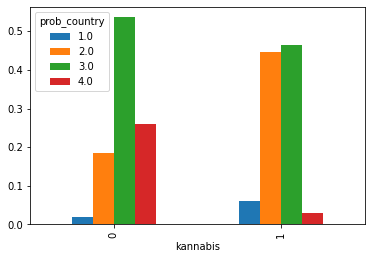

In [62]:
#  k21 Do you think drugs are a problem
# 1-4
#1	Not at all
#2	Minor problem
#3	Moderate problem
#4	Big problem


print(' k21a Do you think drugs are a problem in your country\n', df['K21a'].value_counts(dropna= False)) # in your country
#df['k21a'].fillna((df['k21a'].median()), inplace=True)

df['prob_country'] = df['K21a']



print('\n --------------------------------- \n')

print(' k21b Do you think drugs are a problem in your residential area\n', df['K21b'].value_counts(dropna= False)) #  in your area of residence?

#df['k21b'].fillna((df['k21b'].median()), inplace=True)

df['prob_resident'] = df['K21b']

#pd.crosstab([df['k21a'].fillna('missing'), df['k21a'].fillna('missing')],df['kannabis'].fillna('missing'),margins=True)

pd.crosstab(df.kannabis, df.prob_country,  normalize='index').plot.bar() # stacked=True



In [63]:
chi2_table(df['prob_country'], df['kannabis'])




 Chi-Square test between prob_country and kannabis 
 
 kannabis          0      1    All
prob_country                     
1.0           76.39  23.61  100.0
2.0           81.53  18.47  100.0
3.0           92.46   7.54  100.0
4.0           98.96   1.04  100.0
All           91.39   8.61  100.0 
 
 Pearson Chi2(3)= 161.3029 p-value= 0.0000


In [64]:
chi2_table(df['prob_resident'], df['kannabis'])




 Chi-Square test between prob_resident and kannabis 
 
 kannabis           0      1    All
prob_resident                     
1.0            87.82  12.18  100.0
2.0            90.98   9.02  100.0
3.0            92.38   7.62  100.0
4.0            96.35   3.65  100.0
All            91.27   8.73  100.0 
 
 Pearson Chi2(3)= 19.8749 p-value= 0.0002


## k22 violence threat

In [65]:
# k22 subjected to violence ############
# a tricky question, we can try both responses

# Are you afraid of being subjected to violence due to other people's drug use?
# 1 Yes 
# 2 No
# 3 hard to say

print(df['K22'].value_counts(dropna= False))
df['violence_treat'] = df['K22']

#df['violence_treat'] = np.where(df['K22']== 1, 1, 0)
print('--------------------------')

#print('Are you afraid of being subjected to violence due to other peoples drug use?\n',df['violence_treat'].value_counts(dropna= False))

2.0    1669
3.0     949
1.0     602
NaN       9
Name: K22, dtype: int64
--------------------------


In [66]:
chi2_table(df['violence_treat'], df['kannabis'])




 Chi-Square test between violence_treat and kannabis 
 
 kannabis            0      1    All
violence_treat                     
1.0             94.85   5.15  100.0
2.0             88.62  11.38  100.0
3.0             94.20   5.80  100.0
All             91.43   8.57  100.0 
 
 Pearson Chi2(2)= 35.1739 p-value= 0.0000


## K23 drug punishment

In [67]:
# K23 Do you think drug use should be punished? If so, in what way?
# 1- Ei pitaisi rangaista - Should not be punished
# 2- Kylla, sakkorangaistuksella - Yes, with a fine
# 3- Kylla, vankeusrangaistuksella - Yes, with imprisonment
# 4- Kylla, muulla tavalla, miten?  - Yes, otherwise, how?1- 

print(df['K23'].value_counts(dropna= False))
df['drug_punishment'] = df['K23']


print(pd.crosstab(df.kannabis, df.drug_punishment,  normalize='index'))


df['no_punishment'] = np.where(df['K23'] == 1, 1, 0)
df['fine_punishment'] = np.where(df['K23'] == 2, 1, 0)
df['imprisonment_punishment'] = np.where(df['K23'] == 3, 1, 0)
df['other_punishment'] = np.where(df['K23'] == 4, 1, 0)

print(df[['no_punishment', 'fine_punishment', 'imprisonment_punishment', 'other_punishment']].apply(pd.Series.value_counts).fillna('missing'))





2.0    1006
3.0     887
1.0     656
4.0     639
NaN      41
Name: K23, dtype: int64
drug_punishment       1.0       2.0       3.0       4.0
kannabis                                               
0                0.168497  0.324296  0.298902  0.208305
1                0.602190  0.222628  0.058394  0.116788
   no_punishment  fine_punishment  imprisonment_punishment  other_punishment
0           2573             2223                     2342              2590
1            656             1006                      887               639


In [68]:
chi2_table(df['drug_punishment'], df['kannabis'])




 Chi-Square test between drug_punishment and kannabis 
 
 kannabis             0      1    All
drug_punishment                     
1.0              74.85  25.15  100.0
2.0              93.94   6.06  100.0
3.0              98.20   1.80  100.0
4.0              94.99   5.01  100.0
All              91.41   8.59  100.0 
 
 Pearson Chi2(3)= 299.6662 p-value= 0.0000


## k24 drug usage 

In [69]:
# k24 - What do you think about the following?
# 1-5 
# Completely agree
#	Roughly the same
#	Hard to say
#	Somewhat disagree
#	Completely disagree


# a) Drugs may also be used in a reasonable and non-problematic manner.
# b) The use of marijuana and hashish should be allowed. .



print(df[['K24a', 'K24b']].apply(pd.Series.value_counts).fillna('missing'))


     K24a  K24b
1.0   296   334
2.0   587   500
3.0   394   410
4.0   624   460
5.0  1312  1507


In [70]:
chi2_table(df['K24a'], df['kannabis'])




 Chi-Square test between K24a and kannabis 
 
 kannabis      0      1    All
K24a                         
1.0       54.05  45.95  100.0
2.0       84.33  15.67  100.0
3.0       95.43   4.57  100.0
4.0       97.28   2.72  100.0
5.0       99.01   0.99  100.0
All       91.41   8.59  100.0 
 
 Pearson Chi2(4)= 695.4884 p-value= 0.0000


In [71]:
chi2_table(df['K24b'], df['kannabis'])




 Chi-Square test between K24b and kannabis 
 
 kannabis      0      1    All
K24b                         
1.0       56.89  43.11  100.0
2.0       82.40  17.60  100.0
3.0       93.66   6.34  100.0
4.0       97.83   2.17  100.0
5.0       99.47   0.53  100.0
All       91.40   8.60  100.0 
 
 Pearson Chi2(4)= 709.6807 p-value= 0.0000


## k25 - harm reduction services

In [72]:
# k25  Some drug policy measures have provoked debate and debate.
# What do you think about the following measures or services?

# 1-5 
# Completely agree
#	Roughly the samef
#	Hard to say
#	Somewhat disagree
#	Completely disagree


# a- Health counseling centers for drug users 
# (where they can replace used syringes and needles with clean instruments)

# b - Use of substitution drugs (methadone buprenorphine) in the treatment of opioid addicts
# c - Puncture / use rooms for drug users (to reduce overdoses and prevent use in public places)
# d- Possibility of anonymous testing of the drug in the laboratory (to avoid cases of poisoning)
# e - Distribution of naloxone (an antibody to opiate overdose) to users and their associates
# f - Drug testing in the workplace 
# g - The right of the police to act as a purchaser of drugs (so-called right to buy counterfeit)


print(df[['K25a', 'K25b', 'K25c', 'K25d', 'K25e', 'K25f', 'K25g']].apply(pd.Series.value_counts).fillna('missing'))
#df[['k64a', 'k64b', 'k64c', 'k64d']].apply(pd.Series.value_counts).isnull().sum()



     K25a  K25b  K25c  K25d  K25e  K25f  K25g
1.0  1341   696   589   969   655  2080  2080
2.0  1212  1389  1107   935  1037   784   641
3.0   270   273   766   503   538   163   174
4.0   130   115   331   246   213    80    93
5.0   256   730   419   554   756    98   221


## k26 health risks

**Health risks:** This might be a little bit tricky for you but mainly what I did here is that I first separeted variables into two groups, perceived risks of using drugs and perceiived risks of trying/experimenting drugs. Because people may think that experimenting might be less harmfull compared to regular use. 

In the second stage, I aggregated scores since there are too many variables here. I previously tested its validity with Cronbach alpha test whether this grouping is statistically meaninfull and valid. So, the higher the score on any item, the higher the perceived risk. I also created one variable just in case for any reason. 

In [73]:
# k26  Health riks 
# Ei lainkaan riskiä
# Vähäinen  riski
# Kohtalainen riski
# Suuri riski

# How much health or other risk do you think there is if people do the following?
 # a)	Smoke one or more packs of cigarettes a day
 # b)	Drink themselves drunk at least once a week.
 # c)	Try cannabis once or twice
 # d)	Smoke cannabis regularly.
 # e)	Try ecstasy once or twice
 # f)	Use ecstasy regularly.
 
 # g) Try amphetamine once or twice
 # h) Use amphetamine regularly
 # i) Try heroin once or twice
 # j) Use heroin regularly
 # k) Misuse prescription drugs once or twice
 # l) Misuse prescription drugs regularly
# m) Use other drugs once or twice
# n) Use other drugs regularly 

df[['K26a', 'K26b', 'K26c', 'K26d', 'K26e', 'K26f', 'K26g', 'K26h', 'K26i', 'K26j', 'K26k', 'K26l', 'K26m', 'K26n']].apply(pd.Series.value_counts)

,K26a,K26b,K26c,K26d,K26e,K26f,K26g,K26h,K26i,K26j,K26k,K26l,K26m,K26n
1.0,24,40,601,75,121,14,70,9,31,8,101,10,25,8
2.0,139,463,1197,464,570,72,372,27,156,9,783,31,170,11
3.0,802,1565,795,967,1076,384,946,179,676,69,1464,486,739,129
4.0,2250,1142,616,1705,1433,2735,1818,2993,2348,3116,857,2680,2265,3050


In [74]:
chi2_table(df['K26n'], df['kannabis'])


 Chi-Square test between K26n and kannabis 
 
 kannabis      0      1    All
K26n                         
1.0       75.00  25.00  100.0
2.0       54.55  45.45  100.0
3.0       76.74  23.26  100.0
4.0       92.16   7.84  100.0
All       91.37   8.63  100.0 
 
 Pearson Chi2(3)= 59.0672 p-value= 0.0000


In [75]:

general_list = ['K26a', 'K26b', 'K26c', 'K26d', 'K26e', 'K26f', 'K26g', 'K26h', 'K26i', 'K26j', 'K26k', 'K26l', 'K26m', 'K26n']

for i in general_list:
    df[i].replace({1:0, 2:1, 3:2, 4:3}, inplace= True)


df[['K26a', 'K26b', 'K26c', 'K26d', 'K26e', 'K26f', 'K26g', 'K26h', 'K26i', 'K26j', 'K26k', 'K26l', 'K26m', 'K26n']].apply(pd.Series.value_counts)
    

,K26a,K26b,K26c,K26d,K26e,K26f,K26g,K26h,K26i,K26j,K26k,K26l,K26m,K26n
0.0,24,40,601,75,121,14,70,9,31,8,101,10,25,8
1.0,139,463,1197,464,570,72,372,27,156,9,783,31,170,11
2.0,802,1565,795,967,1076,384,946,179,676,69,1464,486,739,129
3.0,2250,1142,616,1705,1433,2735,1818,2993,2348,3116,857,2680,2265,3050


In [76]:
# processing health risks

# sum all risk
df["overall_health_risk"] = df[general_list].sum(axis=1)


# risk of regular use
risk_list = ["K26a", "K26b", "K26d", "K26f", "K26h", "K26j", "K26l", "K26n"]
df["risk_of_use"] = df[risk_list].sum(axis=1)



# risk of try
try_list = ["K26c", "K26e", "K26g", "K26i", "K26k", "K26m"]
df['risk_of_try'] = df[try_list].sum(axis=1)



In [77]:
# fill missing
#df[["overall_health_risk", "risk_of_try", "risk_of_use"]]=df[["overall_health_risk", "risk_of_try", "risk_of_use"]].fillna(value=df[["overall_health_risk", "risk_of_try", "risk_of_use"]].median())

print('All health risks\n', df['overall_health_risk'].value_counts(dropna= False))
print('\n--------------------------')

print('Risks of try\n', df['risk_of_try'].value_counts(dropna= False))
print('\n--------------------------')


print('Risks of regular use\n', df['risk_of_use'].value_counts(dropna= False))



All health risks
 36.0    262
39.0    258
35.0    252
40.0    248
37.0    246
38.0    236
42.0    212
41.0    212
34.0    205
33.0    190
32.0    159
31.0    131
30.0    118
29.0     98
28.0     67
26.0     66
27.0     62
25.0     51
23.0     26
24.0     24
22.0     21
21.0     18
0.0      13
20.0     11
19.0     11
15.0      5
14.0      5
17.0      4
16.0      3
8.0       2
10.0      2
2.0       2
18.0      2
4.0       2
1.0       1
12.0      1
11.0      1
13.0      1
5.0       1
Name: overall_health_risk, dtype: int64

--------------------------
Risks of try
 18.0    383
15.0    365
16.0    354
14.0    316
17.0    306
12.0    298
13.0    286
11.0    231
10.0    169
9.0     129
8.0     117
6.0      84
7.0      76
5.0      40
0.0      28
3.0      16
4.0      15
2.0      10
1.0       6
Name: risk_of_try, dtype: int64

--------------------------
Risks of regular use
 23.0    695
24.0    653
22.0    614
21.0    470
20.0    325
19.0    168
18.0    128
17.0     52
16.0     40
14.0     20
15

## k27 Punishment for drug offences 

In [78]:
# k27 Punishment for drugs 
# Do you think the following acts should be punished or not? Y/N
# a) Smoking cannabis .
# b) Mixed use of alcohol and medicines
# c) Purchasing medicines from the street trade
# d) Growing cannabis plants 
# e) Picking of mushroom-containing mushrooms 
# f) Use of heroin to relieve withdrawal symptoms
# g) Mailing cocaine 

# 1- Should not be punished
# 2 -Should be punished

print(df[['K27a', 'K27b', 'K27c', 'K27d', 'K27e', 'K27f','K27g']].apply(pd.Series.value_counts))

df['cannabis_pun'] = df['K27a']
df['mixuse_pun'] = df['K27b']
df['purch_medicine_pun'] = df['K27c']
df['grow_cannabis_pun'] = df['K27d']
df['mushroom_pun'] = df['K27e']
df['use_heroin_pun'] = df['K27f']
df['mail_cocaine_pun'] = df['K27g']


print('\n -------------------- \n')

print('Missing values:\n', df[['cannabis_pun', 'mixuse_pun', 'purch_medicine_pun', 'grow_cannabis_pun', 'mushroom_pun' , 'use_heroin_pun', 'mail_cocaine_pun']].apply(pd.Series.isnull).sum())





     K27a  K27b  K27c  K27d  K27e  K27f  K27g
1.0  1436  1694   562   841  1784   338   134
2.0  1769  1496  2643  2365  1406  2872  3076

 -------------------- 

Missing values:
 cannabis_pun          24
mixuse_pun            39
purch_medicine_pun    24
grow_cannabis_pun     23
mushroom_pun          39
use_heroin_pun        19
mail_cocaine_pun      19
dtype: int64


In [79]:
chi2_table(df['cannabis_pun'], df['kannabis'])




 Chi-Square test between cannabis_pun and kannabis 
 
 kannabis          0      1    All
cannabis_pun                     
1.0           82.45  17.55  100.0
2.0           98.70   1.30  100.0
All           91.42   8.58  100.0 
 
 Pearson Chi2(1)= 264.7048 p-value= 0.0000


In [80]:
chi2_table(df['mixuse_pun'], df['kannabis'])




 Chi-Square test between mixuse_pun and kannabis 
 
 kannabis        0      1    All
mixuse_pun                     
1.0         87.25  12.75  100.0
2.0         96.12   3.88  100.0
All         91.41   8.59  100.0 
 
 Pearson Chi2(1)= 78.5493 p-value= 0.0000


In [81]:
chi2_table(df['purch_medicine_pun'], df['kannabis'])




 Chi-Square test between purch_medicine_pun and kannabis 
 
 kannabis                0      1    All
purch_medicine_pun                     
1.0                 79.36  20.64  100.0
2.0                 94.02   5.98  100.0
All                 91.45   8.55  100.0 
 
 Pearson Chi2(1)= 125.5733 p-value= 0.0000


In [82]:
chi2_table(df['grow_cannabis_pun'], df['kannabis'])




 Chi-Square test between grow_cannabis_pun and kannabis 
 
 kannabis               0      1    All
grow_cannabis_pun                     
1.0                73.96  26.04  100.0
2.0                97.63   2.37  100.0
All                91.42   8.58  100.0 
 
 Pearson Chi2(1)= 440.3221 p-value= 0.0000


In [83]:
chi2_table(df['mushroom_pun'], df['kannabis'])




 Chi-Square test between mushroom_pun and kannabis 
 
 kannabis          0      1    All
mushroom_pun                     
1.0           86.49  13.51  100.0
2.0           97.58   2.42  100.0
All           91.38   8.62  100.0 
 
 Pearson Chi2(1)= 121.3746 p-value= 0.0000


In [84]:
chi2_table(df['use_heroin_pun'], df['kannabis'])




 Chi-Square test between use_heroin_pun and kannabis 
 
 kannabis            0      1    All
use_heroin_pun                     
1.0             64.20  35.80  100.0
2.0             94.64   5.36  100.0
All             91.43   8.57  100.0 
 
 Pearson Chi2(1)= 353.7767 p-value= 0.0000


In [85]:
chi2_table(df['mail_cocaine_pun'], df['kannabis'])




 Chi-Square test between mail_cocaine_pun and kannabis 
 
 kannabis              0      1    All
mail_cocaine_pun                     
1.0               57.46  42.54  100.0
2.0               92.95   7.05  100.0
All               91.46   8.54  100.0 
 
 Pearson Chi2(1)= 202.5528 p-value= 0.0000


In [86]:
# correlation between punishment and cannabis use


print(pd.crosstab(df.kannabis, df.cannabis_pun,  normalize='index')) 
print(pd.crosstab(df.kannabis, df.mixuse_pun,  normalize='index'))
print(pd.crosstab(df.kannabis, df.grow_cannabis_pun,  normalize='index'))
print(pd.crosstab(df.kannabis, df.mushroom_pun,  normalize='index'))
print(pd.crosstab(df.kannabis, df.use_heroin_pun,  normalize='index'))
print(pd.crosstab(df.kannabis, df.mail_cocaine_pun,  normalize='index'))


cannabis_pun       1.0       2.0
kannabis                        
0             0.404096  0.595904
1             0.916364  0.083636
mixuse_pun       1.0       2.0
kannabis                      
0           0.506859  0.493141
1           0.788321  0.211679
grow_cannabis_pun       1.0       2.0
kannabis                             
0                  0.212214  0.787786
1                  0.796364  0.203636
mushroom_pun       1.0       2.0
kannabis                        
0             0.529331  0.470669
1             0.876364  0.123636
use_heroin_pun       1.0       2.0
kannabis                          
0               0.073935  0.926065
1               0.440000  0.560000
mail_cocaine_pun       1.0       2.0
kannabis                            
0                 0.026226  0.973774
1                 0.208029  0.791971


## k28 cannabis legality 

In [87]:
# K28 Do you think cannabis should be legally available?
#1 Yes, for any purpose
#2 Yes, but for medical use only
#3 For no purpose  Go to question 30.

df['K28'].value_counts(dropna= False)



2.0    1752
3.0     833
1.0     634
NaN      10
Name: K28, dtype: int64

In [88]:
chi2_table(df['K28'], df['kannabis'])




 Chi-Square test between K28 and kannabis 
 
 kannabis      0      1    All
K28                          
1.0       66.56  33.44  100.0
2.0       96.63   3.37  100.0
3.0       99.40   0.60  100.0
All       91.43   8.57  100.0 
 
 Pearson Chi2(2)= 628.1714 p-value= 0.0000


## K30 decriminalization case

In [89]:
#  ---- k30 If drug use were not illegal, 
# would you be interested in trying or using
# 1-4, 1 
# 1 = Yes, to use
# 2 = Yes, give it a try
# 3 = I don't
# 4 I do not say, ---  dikkat et

# a)	hashish or marijuana? 
# b)	ecstasy?
# c)	heroin

print(df[['K30a', 'K30b', 'K30c']].apply(pd.Series.value_counts))


# processing k26a
# if the option is 1 or 2 = 1 else = 0
    
df["cannabis_decr"] = np.where(df['K30a'] == 1, 1, 
                 (np.where(df['K30a'] == 2, 1, 0)))


print('\n --------------------\n ')

print(df['cannabis_decr'].value_counts(dropna= False))


     K30a  K30b  K30c
1.0   172    28     2
2.0   526   158    22
3.0  2323  2939  3135
4.0   193    85    51

 --------------------
 
0    2531
1     698
Name: cannabis_decr, dtype: int64


In [90]:
chi2_table(df['cannabis_decr'], df['kannabis'])




 Chi-Square test between cannabis_decr and kannabis 
 
 kannabis           0      1    All
cannabis_decr                     
0              98.14   1.86  100.0
1              67.19  32.81  100.0
All            91.45   8.55  100.0 
 
 Pearson Chi2(1)= 666.5387 p-value= 0.0000


In [91]:
chi2_table(df['K30b'], df['kannabis'])




 Chi-Square test between K30b and kannabis 
 
 kannabis      0      1    All
K30b                         
1.0       10.71  89.29  100.0
2.0       48.73  51.27  100.0
3.0       94.83   5.17  100.0
4.0       80.00  20.00  100.0
All       91.43   8.57  100.0 
 
 Pearson Chi2(3)= 658.0930 p-value= 0.0000


In [92]:
chi2_table(df['K30c'], df['kannabis'])




 Chi-Square test between K30c and kannabis 
 
 kannabis      0      1    All
K30c                         
1.0       50.00  50.00  100.0
2.0       31.82  68.18  100.0
3.0       92.25   7.75  100.0
4.0       68.63  31.37  100.0
All       91.43   8.57  100.0 
 
 Pearson Chi2(3)= 140.7255 p-value= 0.0000


## K31 drug user friend

In [93]:
# K31 Do you personally know people who use drugs?
# dummy 
# 1 = yes 2 = no

print(df['K31'].value_counts(dropna= False))

pd.crosstab(df['K31'].fillna('missing'), df['kannabis'].fillna('missing'),margins=True)

df['drug_user_friend'] = np.where(df['K31']== 1, 1, 0)

#pd.crosstab(df.kannabis, df.k27).plot.bar()

print(df['drug_user_friend'].value_counts(dropna= False))


2.0    1743
1.0    1476
NaN      10
Name: K31, dtype: int64
0    1753
1    1476
Name: drug_user_friend, dtype: int64


In [94]:
chi2_table(df['drug_user_friend'], df['kannabis'])




 Chi-Square test between drug_user_friend and kannabis 
 
 kannabis              0      1    All
drug_user_friend                     
0                 99.03   0.97  100.0
1                 82.45  17.55  100.0
All               91.45   8.55  100.0 
 
 Pearson Chi2(1)= 279.5984 p-value= 0.0000


## K32 drug offer

In [95]:
################# k32 offered a drug ################### 
# Have you been offered a drug, either for free or for purchase?
# 1 = yes 2 = no


print(df['K32'].value_counts(dropna= False))

df['drug_offer'] = np.where(df['K32']== 1, 1, 0)

print(df['drug_offer'].value_counts(dropna= False))





2.0    1938
1.0    1290
NaN       1
Name: K32, dtype: int64
0    1939
1    1290
Name: drug_offer, dtype: int64


In [96]:
chi2_table(df['drug_offer'], df['kannabis'])




 Chi-Square test between drug_offer and kannabis 
 
 kannabis        0      1    All
drug_offer                     
0           99.43   0.57  100.0
1           79.46  20.54  100.0
All         91.45   8.55  100.0 
 
 Pearson Chi2(1)= 392.8619 p-value= 0.0000


## K33 drug offer

In [97]:
#####################  k33 drug offers  ################
#  -  How many times in the last 12 months have you been offered a drug in Finland
# 1-5, 1 lowest =1

# No 	1–2 		3–5 		6–9 	or 10  times more


print(df[['K33a', 'K33b']].apply(pd.Series.value_counts))

print('\n ---------\nFree of charge:\n', df['K33a'].value_counts(dropna= False))
print('\n ---------\nWith money:\n', df['K33b'].value_counts(dropna= False))

# olmaz bu, yukaridaki yeterli 
df['free_offer'] = np.where(df['K33a'] > 1, 1, 0)
df['purchase_offer'] = np.where(df['K33b'] > 1, 1, 0)


print('\n ---------\nFree of charge:\n', df['free_offer'].value_counts(dropna= False))
print('\n ---------\nWith money:\n', df['purchase_offer'].value_counts(dropna= False))

#  na cok 



     K33a  K33b
1.0   786   953
2.0   327   170
3.0    81    66
5.0    65    62
4.0    29    27

 ---------
Free of charge:
 NaN    1941
1.0     786
2.0     327
3.0      81
5.0      65
4.0      29
Name: K33a, dtype: int64

 ---------
With money:
 NaN    1951
1.0     953
2.0     170
3.0      66
5.0      62
4.0      27
Name: K33b, dtype: int64

 ---------
Free of charge:
 0    2727
1     502
Name: free_offer, dtype: int64

 ---------
With money:
 0    2904
1     325
Name: purchase_offer, dtype: int64


In [98]:
chi2_table(df['free_offer'], df['kannabis'])




 Chi-Square test between free_offer and kannabis 
 
 kannabis        0      1    All
free_offer                     
0           97.98   2.02  100.0
1           55.98  44.02  100.0
All         91.45   8.55  100.0 
 
 Pearson Chi2(1)= 951.6701 p-value= 0.0000


In [99]:
chi2_table(df['purchase_offer'], df['kannabis'])




 Chi-Square test between purchase_offer and kannabis 
 
 kannabis            0      1    All
purchase_offer                     
0               95.63   4.37  100.0
1               54.15  45.85  100.0
All             91.45   8.55  100.0 
 
 Pearson Chi2(1)= 637.8429 p-value= 0.0000


## K34 - drug accessibility

In [100]:
# k 34 --  Imagine that you would like to acquire the following substances. 

# a) cannabis?
# b) muuta huumausainetta?
# c) intoxicants (eg opioids or benzodiazepines)?
# d) doping substances?

# How difficult or easy would it be for you to get it within 24 hours
# 1= Impossible
# 2 = pretty hard
# 3 =	Quite easy
# 4 = Very easy
# 5 = I can not say

print(df[['K34a', 'K34b', 'K34c', 'K34d']].apply(pd.Series.value_counts))

df['cannabis_access'] = df['K34a'].replace({5:0, 4:1, 3:2, 2:3, 1:4})
df['other_drug_access'] = df['K34b'].replace({5:0, 4:1, 3:2, 2:3, 1:4})
df['intoxicant_access'] = df['K34c'].replace({5:0, 4:1, 3:2, 2:3, 1:4})
df['doping_access'] = df['K34d'].replace({5:0, 4:1, 3:2, 2:3, 1:4})



print(df[['cannabis_access', 'other_drug_access', 'intoxicant_access', 'doping_access']].apply(pd.Series.value_counts))

#df[['cannabis_access', 'other_access', 'doping_access']]=df[['cannabis_access', 'other_access', 'doping_access']].fillna(value=df[['cannabis_access', 'other_access', 'doping_access']].median())




     K34a  K34b  K34c  K34d
1.0   467   659   701   824
2.0   485   632   598   598
3.0   688   479   376   243
4.0   591   231   275   102
5.0   980  1202  1258  1434
     cannabis_access  other_drug_access  intoxicant_access  doping_access
0.0              980               1202               1258           1434
1.0              591                231                275            102
2.0              688                479                376            243
3.0              485                632                598            598
4.0              467                659                701            824


In [101]:
chi2_table(df['cannabis_access'], df['kannabis'])




 Chi-Square test between cannabis_access and kannabis 
 
 kannabis             0      1    All
cannabis_access                     
0.0              99.39   0.61  100.0
1.0              73.60  26.40  100.0
2.0              87.35  12.65  100.0
3.0              95.67   4.33  100.0
4.0              98.93   1.07  100.0
All              91.44   8.56  100.0 
 
 Pearson Chi2(4)= 378.3352 p-value= 0.0000


In [102]:
chi2_table(df['other_drug_access'], df['kannabis'])




 Chi-Square test between other_drug_access and kannabis 
 
 kannabis               0      1    All
other_drug_access                     
0.0                96.59   3.41  100.0
1.0                74.03  25.97  100.0
2.0                83.72  16.28  100.0
3.0                89.56  10.44  100.0
4.0                95.60   4.40  100.0
All                91.45   8.55  100.0 
 
 Pearson Chi2(4)= 184.2549 p-value= 0.0000


In [103]:
chi2_table(df['intoxicant_access'], df['kannabis'])




 Chi-Square test between intoxicant_access and kannabis 
 
 kannabis               0      1    All
intoxicant_access                     
0.0                95.87   4.13  100.0
1.0                81.45  18.55  100.0
2.0                86.44  13.56  100.0
3.0                88.46  11.54  100.0
4.0                92.72   7.28  100.0
All                91.46   8.54  100.0 
 
 Pearson Chi2(4)= 86.9778 p-value= 0.0000


In [104]:
chi2_table(df['doping_access'], df['kannabis'])




 Chi-Square test between doping_access and kannabis 
 
 kannabis           0      1    All
doping_access                     
0.0            93.79   6.21  100.0
1.0            83.33  16.67  100.0
2.0            87.65  12.35  100.0
3.0            88.29  11.71  100.0
4.0            91.75   8.25  100.0
All            91.44   8.56  100.0 
 
 Pearson Chi2(4)= 30.8218 p-value= 0.0000


## K35 Other drugs

In [105]:
# K35. Have you ever tried or used any drugs
#(such as hashish, marijuana, amphetamines, heroin, or other similar substances)?

# 1 yes 2 No

print(df['K35'].value_counts(dropna= False))

2.0    2370
1.0     856
NaN       3
Name: K35, dtype: int64


## K42 kannabis and marijuana

In [106]:
# k42 How often have you used hashish or marijuana in the last 12 months?
# 1- Daily
# 2 - At least once a week
# 3- 1-3 times a month
# 4- 3 to 10 times a year
# 5- 1-2 times a year
# 6- I have not used in the last 12 months 4 Go to question


df['kannabis_two'] = np.where(df['K42'] < 6, 1, 0)


print(df['K42'].value_counts(dropna= False))

print(df['kannabis_two'].value_counts(dropna= False))

NaN    2929
5.0     125
4.0      69
3.0      36
2.0      36
6.0      24
1.0      10
Name: K42, dtype: int64
0    2953
1     276
Name: kannabis_two, dtype: int64


## K69 - Polydrug use

In [107]:
# K69 - 69. Have you used at least two different substances at the same time 
# (eg alcohol and drugs, drugs and alcohol, two different drugs)?

# Never 
# Yes sometimes, but not in the last 12 months 
# Yes, in the last 12 months

print(df['K69'].value_counts(dropna= False))


df['poly_drug'] = np.where(df['K69'] == 3, 1, 0)
print('\n-----------------\n')

print('Polydrug usee in the last 12 month\n', df['poly_drug'].value_counts(dropna= False))



1.0    2677
2.0     352
3.0     187
NaN      13
Name: K69, dtype: int64

-----------------

Polydrug usee in the last 12 month
 0    3042
1     187
Name: poly_drug, dtype: int64


## K70 polydrug use pattern

In [108]:
# 70.	Kuinka usein viimeksi kuluneiden 12 kuukauden aikana olet kayttanyt:
# 70. How often in the last 12 months have you used:

#a) drugs at the same time as alcohol?
#b) drugs at the same time as drugs?
#c) hashish or marijuana at the same time as alcohol?
#d) other drugs at the same time as alcohol?
#e) two or more drugs at the same time?
#f) Drugs, alcohol and drugs at the same time?

# 1- At least once a week
# 2- 1-3 times a month
# 3- 10 times a year
# 4- 1-2 times a year
# 5- Not once

print(df[['K70a', 'K70b', 'K70c', 'K70d', 'K70e', 'K70f']].apply(pd.Series.value_counts))





     K70a  K70b  K70c  K70d  K70e   K70f
1.0     4     3    10     1     1    NaN
2.0    13     3    24     8     7    6.0
3.0    16     7    46    24    19    7.0
4.0    41    16    65    25    25   14.0
5.0   122   163    52   137   141  165.0


# K78 - Health status

In [109]:
##########  K78 current state of health? #########
# 78 - What do you think about your current state of health?
# 1- Very good 
# 2- Pretty good 
# 3- Moderate 
# 4- Quite bad 
# 5- Very bad 

print(df['K78'].value_counts(dropna= False))
df['current_health'] = df['K78']



2.0    1639
3.0     728
1.0     711
4.0     114
5.0      21
NaN      16
Name: K78, dtype: int64


In [110]:
chi2_table(df['current_health'], df['kannabis'])




 Chi-Square test between current_health and kannabis 
 
 kannabis            0     1    All
current_health                    
1.0             90.44  9.56  100.0
2.0             91.21  8.79  100.0
3.0             92.72  7.28  100.0
4.0             92.11  7.89  100.0
5.0             95.24  4.76  100.0
All             91.44  8.56  100.0 
 
 Pearson Chi2(4)= 2.9976 p-value= 0.5582


## K80 Health problems

In [111]:
# categoric

# ------ K80 ---------------
# Have you had any health problems that you believe have been caused by:
#1.	Yes, in the last 12 months
#2.	Yes, but not in the last 12 months
#3.	Never
#4.	I do not use that substance

 # a)	your use of alcohol?
 # b)	your drug use ?.
 # c)	your use of sedatives, hypnotics or painkillers ?. 
 # d)  the simultaneous use of different substances?
 # e)	your use of doping substances?


print(df[['K80a', 'K80b', 'K80c', 'K80d', 'K80e']].apply(pd.Series.value_counts))
df[['K80a', 'K80b', 'K80c', 'K80d', 'K80e']].apply(pd.Series.value_counts).isnull().sum()


df['alcohol_hp'] = np.where(df['K80a'] == 1, 1, 0)
df['drug_hp'] = np.where(df['K80b'] == 1, 1, 0)
df['medicine_hp'] = np.where(df['K80c'] == 1, 1, 0)
df['poly_hp'] = np.where(df['K80d'] == 1, 1, 0)
df['doping_hp'] = np.where(df['K80e'] == 1, 1, 0)

print('\n-------------------\n')

print('Health problems in the last 12 month\n', df[['alcohol_hp','drug_hp', 'medicine_hp', 'poly_hp', 'doping_hp']].apply(pd.Series.value_counts))






     K80a  K80b  K80c  K80d    K80e
1.0   132    12    27    20     NaN
2.0   199    54    76    52     6.0
3.0  2427  1058  1453  1170   857.0
4.0   435  2050  1618  1933  2310.0

-------------------

Health problems in the last 12 month
    alcohol_hp  drug_hp  medicine_hp  poly_hp  doping_hp
0        3097     3217         3202     3209     3229.0
1         132       12           27       20        NaN


In [112]:
chi2_table(df['alcohol_hp'], df['kannabis'])




 Chi-Square test between alcohol_hp and kannabis 
 
 kannabis        0      1    All
alcohol_hp                     
0           92.12   7.88  100.0
1           75.76  24.24  100.0
All         91.45   8.55  100.0 
 
 Pearson Chi2(1)= 41.3010 p-value= 0.0000


In [113]:
chi2_table(df['drug_hp'], df['kannabis'])




 Chi-Square test between drug_hp and kannabis 
 
 kannabis      0      1    All
drug_hp                      
0         91.70   8.30  100.0
1         25.00  75.00  100.0
All       91.45   8.55  100.0 
 
 Pearson Chi2(1)= 59.7778 p-value= 0.0000


In [114]:
chi2_table(df['medicine_hp'], df['kannabis'])




 Chi-Square test between medicine_hp and kannabis 
 
 kannabis         0      1    All
medicine_hp                     
0            91.66   8.34  100.0
1            66.67  33.33  100.0
All          91.45   8.55  100.0 
 
 Pearson Chi2(1)= 18.3203 p-value= 0.0000


In [115]:
chi2_table(df['poly_hp'], df['kannabis'])




 Chi-Square test between poly_hp and kannabis 
 
 kannabis      0      1    All
poly_hp                      
0         91.87   8.13  100.0
1         25.00  75.00  100.0
All       91.45   8.55  100.0 
 
 Pearson Chi2(1)= 105.2947 p-value= 0.0000


In [116]:
chi2_table(df['doping_hp'], df['kannabis'])




 Chi-Square test between doping_hp and kannabis 
 
 kannabis       0     1    All
doping_hp                    
0          91.45  8.55  100.0
All        91.45  8.55  100.0 
 
 Pearson Chi2(0)= 0.0000 p-value= 1.0000


## K82 Sport

In [117]:
# numeric

# ---  k82 -----------
# How many times a week do you do sports or exercise?# 1- Very good 
# 1	I don't exercise ....
# 2	Less than once a week
# 3	1-2 times a week
# 4	3-4 times a week
# 5	5-7 times a week
# 6- 8 times a week or more


print(df['K82'].value_counts(dropna= False))

#df['K82'].fillna((df['K82']).median(), inplace=True)

df['sport'] = df['K82']
print(df['sport'].value_counts(dropna= False, normalize=True))





print('--------------\n', df['sport'].value_counts(dropna= False))






4.0    1101
3.0     996
5.0     556
2.0     355
1.0     138
6.0      69
NaN      14
Name: K82, dtype: int64
4.0    0.340972
3.0    0.308455
5.0    0.172190
2.0    0.109941
1.0    0.042738
6.0    0.021369
NaN    0.004336
Name: sport, dtype: float64
--------------
 4.0    1101
3.0     996
5.0     556
2.0     355
1.0     138
6.0      69
NaN      14
Name: sport, dtype: int64


In [118]:
chi2_table(df['sport'], df['kannabis'])




 Chi-Square test between sport and kannabis 
 
 kannabis      0      1    All
sport                        
1.0       91.30   8.70  100.0
2.0       90.70   9.30  100.0
3.0       91.67   8.33  100.0
4.0       91.19   8.81  100.0
5.0       92.27   7.73  100.0
6.0       89.86  10.14  100.0
All       91.45   8.55  100.0 
 
 Pearson Chi2(5)= 1.1091 p-value= 0.9533


## K86 Unemployment 

In [119]:
# --- K866 -----
# Have you been unemployed in the last 12 months?
# 1 I have not been unemployed 
# 2 I've been unemployed for a total of ________ months

print(df['K86'].value_counts(dropna= False))
print(df['K86'].value_counts(dropna= False, normalize= True))




# null marked as unumployed 
df['employment'] = np.where(df['K86'] ==2, 1, 0)

print(df['employment'].value_counts(dropna= False, normalize= True))





1.0    2617
2.0     536
NaN      76
Name: K86, dtype: int64
1.0    0.810468
2.0    0.165996
NaN    0.023537
Name: K86, dtype: float64
0    0.834004
1    0.165996
Name: employment, dtype: float64


In [120]:
chi2_table(df['employment'], df['kannabis'])




 Chi-Square test between employment and kannabis 
 
 kannabis        0      1    All
employment                     
0           92.57   7.43  100.0
1           85.82  14.18  100.0
All         91.45   8.55  100.0 
 
 Pearson Chi2(1)= 25.2180 p-value= 0.0000


# Data Processing 

In [121]:
binary_list = ['has_child', 'non_medical','nicotine_vap','other_vap', 'flavor_vap',
                'drug_user_friend', 'free_offer','purchase_offer' ,
               'alcohol_hp', 'drug_hp', 'medicine_hp', 'poly_hp', 'doping_hp', 'employment']


categoric_list = ['gender', 'age_bins', 'education', 'residency', 'marriage_status', 'household',
                  'drug_punishment', 'violence_treat']

numeric_list = ['alcohol_use', 'nuuska', 'cigarette', 'e_cigarette', 
                'prob_country', 'prob_resident', 
                'risk_of_use', 'risk_of_try', 
                'cannabis_access', 'other_drug_access', 
                'intoxicant_access', 'doping_access', 'current_health', 'sport' ]

In [122]:
df[binary_list].isnull().sum()



has_child           0
non_medical         0
nicotine_vap        0
other_vap           0
flavor_vap          0
drug_user_friend    0
free_offer          0
purchase_offer      0
alcohol_hp          0
drug_hp             0
medicine_hp         0
poly_hp             0
doping_hp           0
employment          0
dtype: int64

In [123]:
df[categoric_list].isnull().sum()

gender              0
age_bins            0
education          15
residency           9
marriage_status    19
household          15
drug_punishment    41
violence_treat      9
dtype: int64

In [124]:
df[numeric_list].isnull().sum()

alcohol_use          257
nuuska                 8
cigarette              5
e_cigarette            6
prob_country          24
prob_resident         80
risk_of_use            0
risk_of_try            0
cannabis_access       18
other_drug_access     26
intoxicant_access     21
doping_access         28
current_health        16
sport                 14
dtype: int64

## Recoded data

In [125]:
target = ['kannabis']
new_data = target+numeric_list + binary_list + categoric_list

data= df[new_data]
data.head().T

,0,1,2,3,4
kannabis,0,0,0,1,0
alcohol_use,3.0,1.0,5.0,7.0,5.0
nuuska,1.0,1.0,1.0,2.0,1.0
cigarette,1.0,1.0,2.0,2.0,1.0
e_cigarette,1.0,1.0,1.0,1.0,1.0
prob_country,3.0,3.0,4.0,3.0,3.0
prob_resident,2.0,2.0,3.0,2.0,2.0
risk_of_use,24.0,23.0,24.0,22.0,24.0
risk_of_try,13.0,17.0,18.0,12.0,16.0
cannabis_access,0.0,3.0,0.0,3.0,2.0


In [126]:
data.shape

(3229, 37)

### Dummy

In [127]:
data = pd.get_dummies(data, columns = binary_list, drop_first=True)
data= pd.get_dummies(data,columns=categoric_list)
data.shape

(3229, 61)

In [128]:
data.head().T


,0,1,2,3,4
kannabis,0.0,0.0,0.0,1.0,0.0
alcohol_use,3.0,1.0,5.0,7.0,5.0
nuuska,1.0,1.0,1.0,2.0,1.0
cigarette,1.0,1.0,2.0,2.0,1.0
e_cigarette,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
drug_punishment_3.0,0.0,0.0,0.0,0.0,0.0
drug_punishment_4.0,0.0,0.0,1.0,0.0,1.0
violence_treat_1.0,0.0,0.0,0.0,1.0,0.0
violence_treat_2.0,0.0,1.0,1.0,0.0,0.0


## Impute missing values

In [129]:
# impute missing values via the column most_frequent

from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(data.values)
imputed_data = imr.transform(data.values)
imputed_data

array([[0., 3., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 5., 1., ..., 0., 1., 0.],
       ...,
       [0., 4., 4., ..., 0., 0., 1.],
       [0., 5., 1., ..., 0., 1., 0.],
       [0., 3., 1., ..., 0., 1., 0.]])

In [130]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

#savetxt('thl_array.csv', imputed_data, delimiter=',')

#### Impute missing and out as dataframe

In [131]:
# impute missing values via the column mean

from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
imputed_data=pd.DataFrame(imp.fit_transform(data))
imputed_data.columns=data.columns
imputed_data.index=data.index

In [132]:
imputed_data.head()

,kannabis,alcohol_use,nuuska,cigarette,e_cigarette,prob_country,prob_resident,risk_of_use,risk_of_try,cannabis_access,...,household_1.0,household_2.0,household_3.0,drug_punishment_1.0,drug_punishment_2.0,drug_punishment_3.0,drug_punishment_4.0,violence_treat_1.0,violence_treat_2.0,violence_treat_3.0
0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,24.0,13.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,1.0,1.0,3.0,2.0,23.0,17.0,3.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,5.0,1.0,2.0,1.0,4.0,3.0,24.0,18.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,7.0,2.0,2.0,1.0,3.0,2.0,22.0,12.0,3.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,5.0,1.0,1.0,1.0,3.0,2.0,24.0,16.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [133]:
#imputed_data.to_csv('thl_recoded.csv', index=False)

In [134]:
imputed_data.shape

(3229, 61)

## KNN impute

In [135]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed_knn = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)
imputed_knn.head()


,kannabis,alcohol_use,nuuska,cigarette,e_cigarette,prob_country,prob_resident,risk_of_use,risk_of_try,cannabis_access,...,household_1.0,household_2.0,household_3.0,drug_punishment_1.0,drug_punishment_2.0,drug_punishment_3.0,drug_punishment_4.0,violence_treat_1.0,violence_treat_2.0,violence_treat_3.0
0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,24.0,13.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,1.0,1.0,3.0,2.0,23.0,17.0,3.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,5.0,1.0,2.0,1.0,4.0,3.0,24.0,18.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,7.0,2.0,2.0,1.0,3.0,2.0,22.0,12.0,3.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,5.0,1.0,1.0,1.0,3.0,2.0,24.0,16.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [136]:
imputed_knn.to_csv('thl_recoded.csv', index=False)

In [137]:
imputed_knn.shape

(3229, 61)

## Correlation plot

<AxesSubplot:>

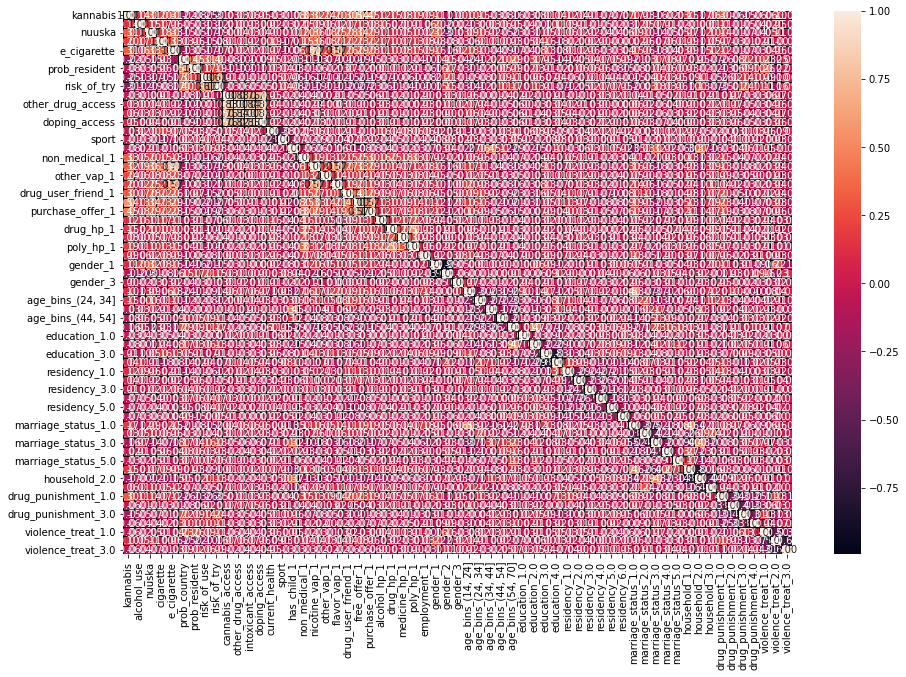

In [138]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(imputed_knn.corr(), annot = True, linecolor = "black", lw = 0.5, fmt= '.2f') 

Since we have too many variables, graph is not helpfull to find out correlated variables. Then we can create a list to analyse the correlated variables. 

In [139]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(imputed_knn, 15))

Top Absolute Correlations
gender_1            gender_2              0.993788
intoxicant_access   doping_access         0.847735
other_drug_access   intoxicant_access     0.839633
education_3.0       education_4.0         0.830276
cannabis_access     other_drug_access     0.826495
other_drug_access   doping_access         0.818179
household_1.0       household_2.0         0.801969
e_cigarette         nicotine_vap_1        0.773128
cannabis_access     intoxicant_access     0.749884
                    doping_access         0.746247
violence_treat_2.0  violence_treat_3.0    0.667316
risk_of_use         risk_of_try           0.606799
nicotine_vap_1      flavor_vap_1          0.574873
e_cigarette         flavor_vap_1          0.569905
free_offer_1        purchase_offer_1      0.566655
dtype: float64


It seems that responses of two categorical variables are correlated but this this an expected situation since they are the part of the same questions. 

# Final chi-square test

In [140]:
from sklearn.feature_selection import chi2
X = imputed_knn.drop('kannabis',axis=1)
y = imputed_knn['kannabis']

chi_scores = chi2(X,y)

In [141]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

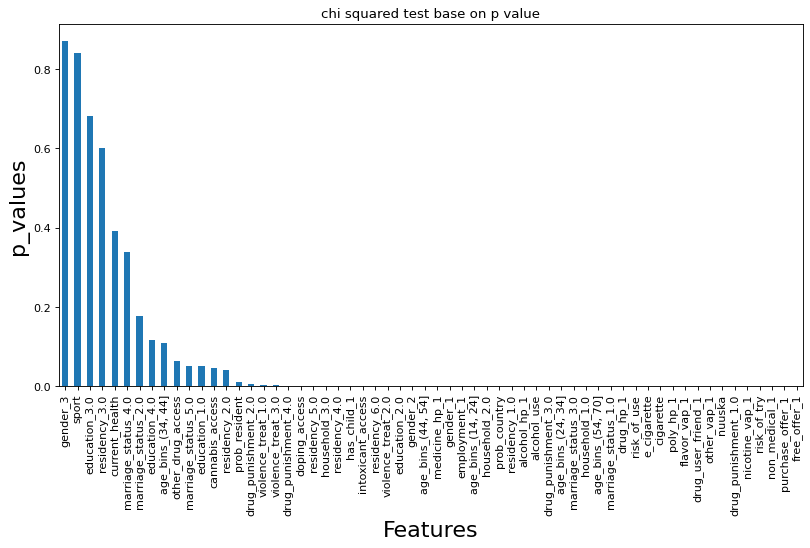

In [142]:


from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)


p_values.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()

In [143]:
p_values

gender_3                8.695102e-01
sport                   8.389584e-01
education_3.0           6.806297e-01
residency_3.0           5.991441e-01
current_health          3.902204e-01
marriage_status_4.0     3.390414e-01
marriage_status_2.0     1.762338e-01
education_4.0           1.154784e-01
age_bins_(34, 44]       1.078556e-01
other_drug_access       6.301430e-02
marriage_status_5.0     5.028184e-02
education_1.0           5.028184e-02
cannabis_access         4.711958e-02
residency_2.0           4.032515e-02
prob_resident           1.144614e-02
drug_punishment_2.0     4.834596e-03
violence_treat_1.0      2.863694e-03
violence_treat_3.0      2.427798e-03
drug_punishment_4.0     1.372509e-03
doping_access           6.930126e-04
residency_5.0           5.307161e-04
household_3.0           5.130625e-04
residency_4.0           1.884817e-04
has_child_1             1.028359e-04
intoxicant_access       9.098257e-05
residency_6.0           4.382390e-05
violence_treat_2.0      3.402112e-05
e